In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from missingno import matrix


In [192]:
# Example of using load_data function to load a CSV file named 'example.csv' from the data directory.
# loaded_data = load_data('example.csv')
# print(loaded_data.head())  # Uncomment to load the data and print the first 5 rows.

# Example of using save_data function to save a DataFrame named 'df' to a CSV file named 'example_save.csv' in the data directory.
# save_data(df, 'example_save.csv')  # Uncomment to save 'df' to 'example_save.csv'.

# Example of using save_fig function to save a figure with ID 'example_figure'.
# First, create a figure using matplotlib (uncomment the lines below to create and save the figure).
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.plot([1, 2, 3], [1, 4, 9])
# save_fig('example_figure')  # Uncomment to save the figure to 'example_figure.png'.


In [193]:
from pathlib import Path
DATA_PATH = Path() / "../data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

PLOT_PATH = Path() / "../plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)

In [194]:
from pathlib import Path
file_path = Path("../data/test_df.csv")
print(file_path.exists())

True


In [195]:
df_train = load_data('train_df.csv')
df_test = load_data('test_df.csv') 
df_train

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,RFM_Group_At Risk,RFM_Group_Hibernating,RFM_Group_Loyalist,RFM_Group_Need Attention,RFM_Group_New Customers,RFM_Group_Potential Loyalist,RFM_Group_Promising,Age_Demographic_Baby Boomer,Age_Demographic_Gen X,Age_Demographic_Gen Y
0,-0.907878,1.042749,-0.939402,0.993008,-0.832494,-0.661714,-0.688503,-0.648271,-0.624425,-0.814261,...,-0.131533,1.889431,-0.540655,-0.124676,-0.127,-0.558143,-0.142278,-0.787296,1.071727,-0.423255
1,2.069402,-0.822778,0.907984,0.889557,2.090909,0.162166,1.165943,1.248667,1.773901,-0.547871,...,-0.131533,-0.529260,-0.540655,-0.124676,-0.127,1.791654,-0.142278,1.270171,-0.933073,-0.423255
2,-0.412309,1.042749,0.907984,1.199910,-0.894443,-0.636748,-0.725407,-0.648271,-0.624425,-0.776206,...,-0.131533,1.889431,-0.540655,-0.124676,-0.127,-0.558143,-0.142278,-0.787296,1.071727,-0.423255
3,-0.493002,1.042749,-0.939402,1.061976,-0.847243,-0.461985,-0.665438,-0.415627,-0.575974,-0.681066,...,-0.131533,1.889431,-0.540655,-0.124676,-0.127,-0.558143,-0.142278,-0.787296,-0.933073,2.362645
4,-0.102784,1.042749,-0.939402,-1.696718,-0.000607,-0.661714,-0.420946,-0.684062,-0.648651,-0.414676,...,-0.131533,-0.529260,1.849609,-0.124676,-0.127,-0.558143,-0.142278,-0.787296,1.071727,-0.423255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,-0.854501,-0.822778,-0.939402,-0.110469,-0.791194,-0.611781,-0.688503,-0.540897,-0.648651,-0.738150,...,-0.131533,-0.529260,-0.540655,-0.124676,-0.127,-0.558143,-0.142278,-0.787296,-0.933073,2.362645
1760,0.974171,-0.822778,0.907984,0.717139,2.701549,0.037336,-0.111872,-0.684062,-0.309493,2.344366,...,-0.131533,-0.529260,-0.540655,-0.124676,-0.127,-0.558143,7.028513,-0.787296,1.071727,-0.423255
1761,0.282502,-0.822778,-0.939402,0.337819,1.259023,0.336928,0.086489,0.246511,-0.164140,-0.281481,...,-0.131533,-0.529260,-0.540655,-0.124676,-0.127,1.791654,-0.142278,1.270171,-0.933073,-0.423255
1762,-1.181238,1.042749,0.907984,-0.351855,-0.800044,-0.661714,-0.679277,-0.684062,-0.648651,-0.795233,...,-0.131533,-0.529260,-0.540655,-0.124676,-0.127,-0.558143,-0.142278,1.270171,-0.933073,-0.423255


In [196]:
type(df_train)

pandas.core.frame.DataFrame

In [197]:
df_train.value_counts('AcceptedCmp1')

AcceptedCmp1
0    1646
1     118
dtype: int64

In [198]:
# Calculate the correlation matrix
correlation_matrix = df_train.corr()
correlation_matrix.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,RFM_Group_At Risk,RFM_Group_Hibernating,RFM_Group_Loyalist,RFM_Group_Need Attention,RFM_Group_New Customers,RFM_Group_Potential Loyalist,RFM_Group_Promising,Age_Demographic_Baby Boomer,Age_Demographic_Gen X,Age_Demographic_Gen Y
Income,1.000000,-0.520322,0.049307,0.013434,0.728688,0.541817,0.696621,0.551126,0.546000,0.427911,...,-0.023417,-0.421574,0.424502,-0.059573,0.110187,0.426784,0.108452,0.196344,-0.112909,-0.108958
Kidhome,-0.520322,1.000000,-0.042231,0.012241,-0.492919,-0.363081,-0.439872,-0.379612,-0.365886,-0.358734,...,0.047184,0.319117,-0.305808,0.095548,-0.079108,-0.305156,-0.101896,-0.273518,0.228776,0.052444
Teenhome,0.049307,-0.042231,1.000000,0.021937,0.002315,-0.179901,-0.256330,-0.204056,-0.157669,0.000032,...,0.095131,-0.015913,0.025301,0.070551,-0.052270,0.046602,-0.066068,0.281752,0.009487,-0.394689
Recency,0.013434,0.012241,0.021937,1.000000,0.020998,0.009545,0.031819,0.005689,0.027665,0.022425,...,-0.123842,0.479081,-0.466197,0.105174,-0.110690,0.479918,0.120116,0.032121,-0.018815,-0.017348
MntWines,0.728688,-0.492919,0.002315,0.020998,1.000000,0.382229,0.590794,0.385759,0.371554,0.394029,...,-0.051971,-0.413129,0.419676,-0.059153,0.062756,0.425597,0.105729,0.154595,-0.108820,-0.058111


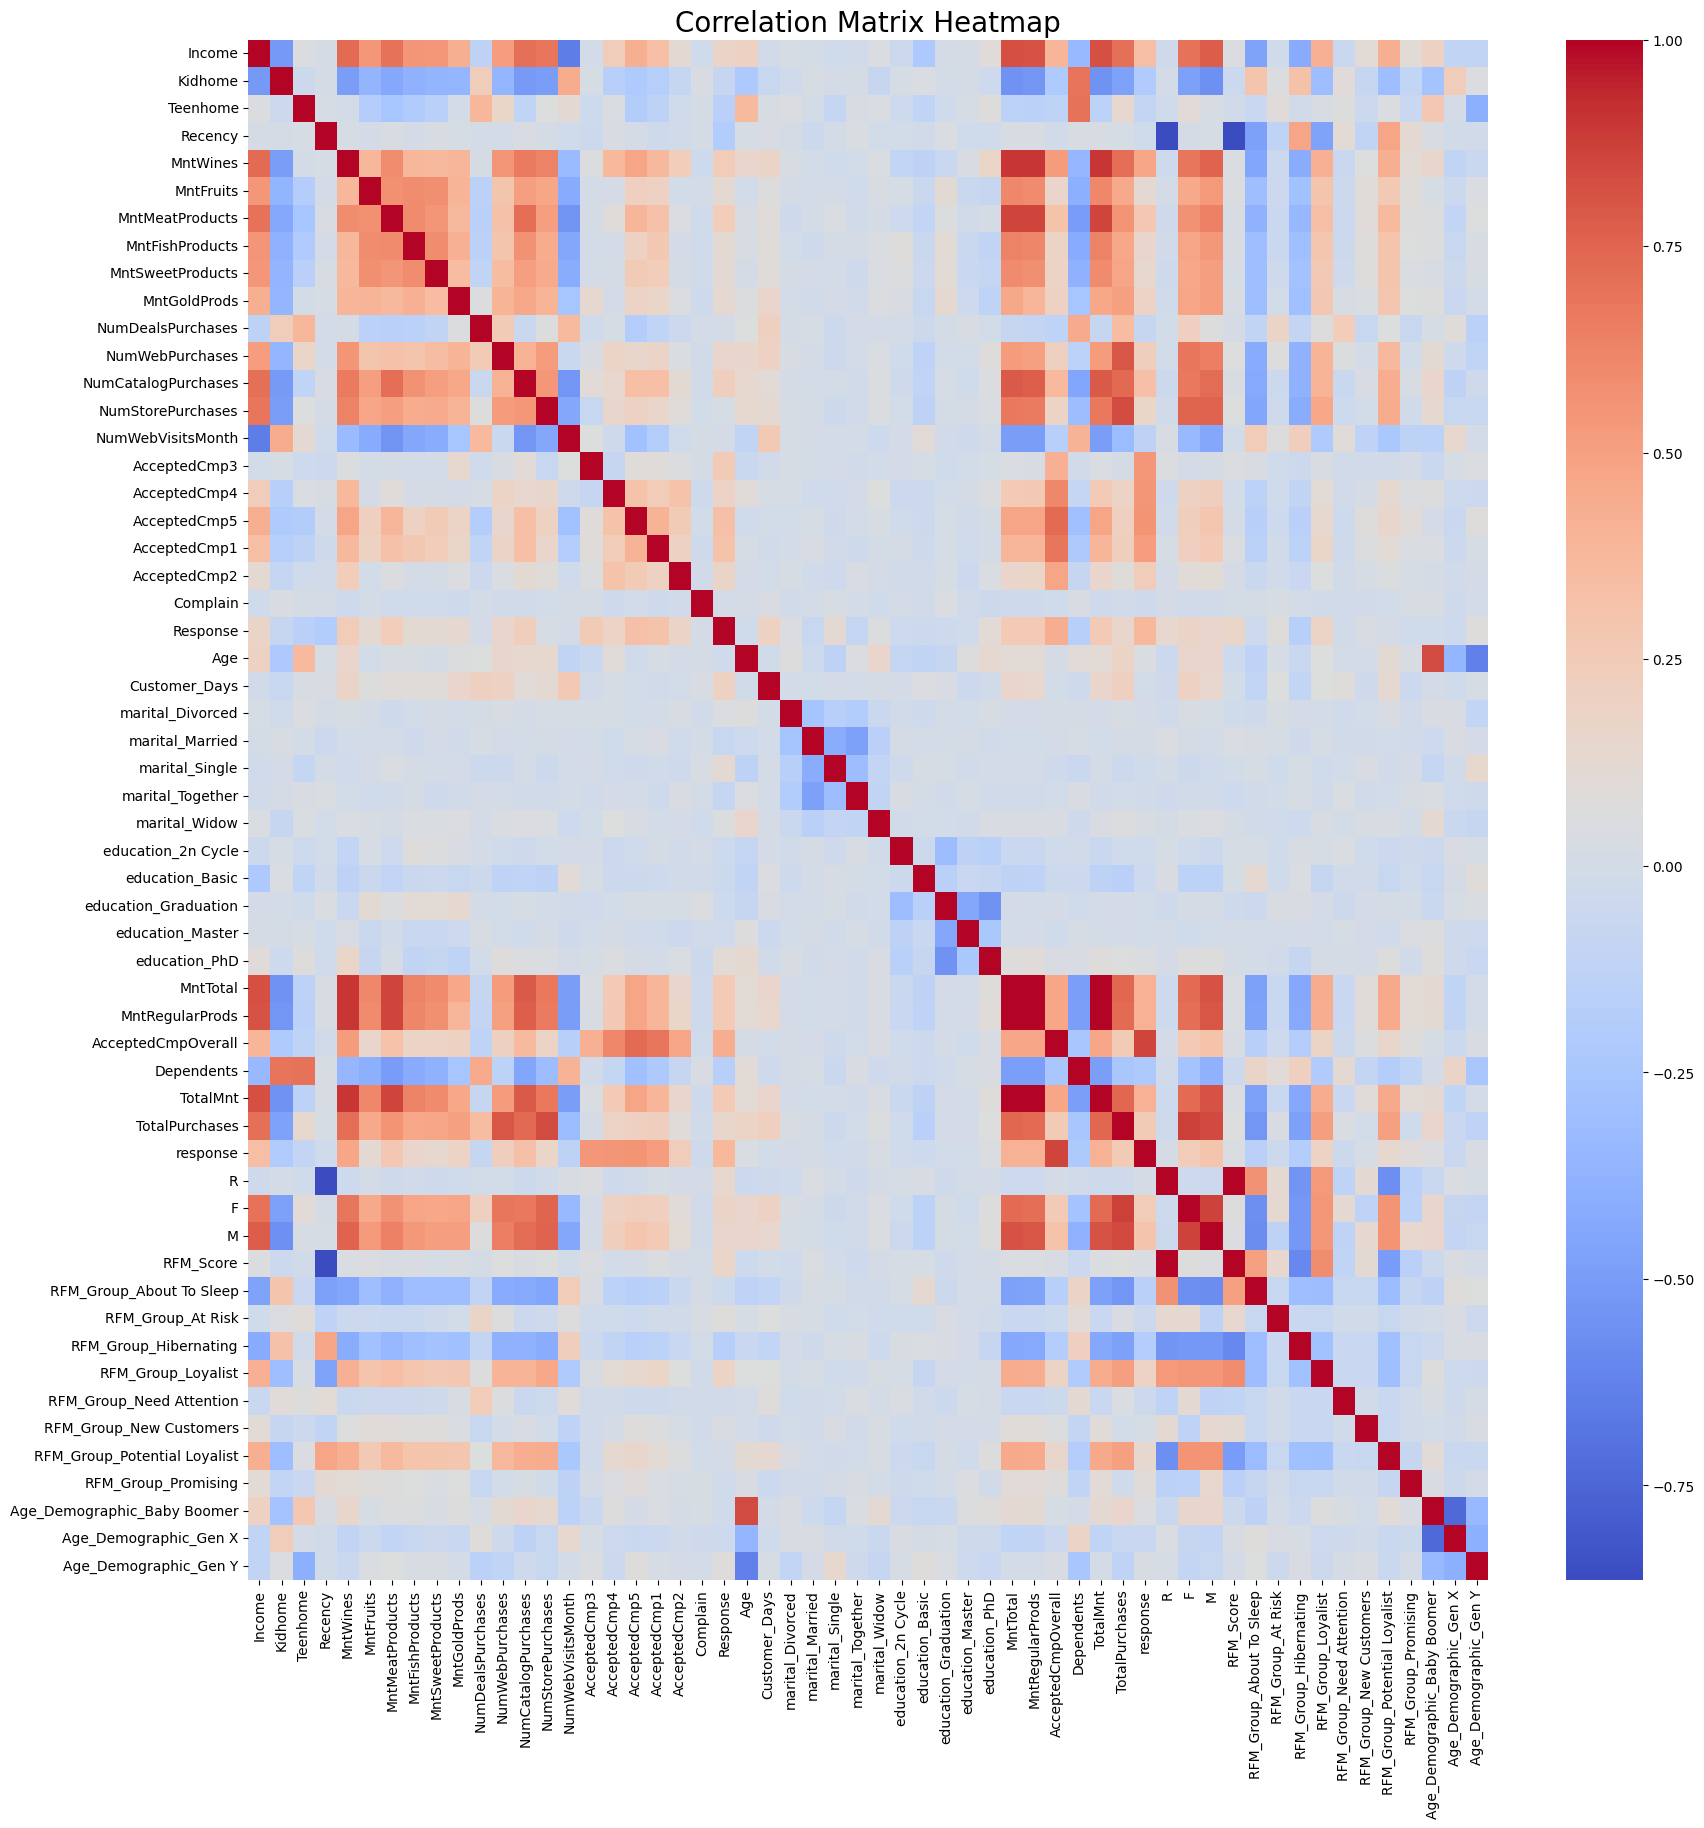

In [199]:
import seaborn as sns

# Set the size for the heatmap
plt.figure(figsize=(20, 20))

# Create the heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f")

# Improve readability
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)

# Show the plot
plt.show()


# Random Forest

In [200]:
type(df_train)

pandas.core.frame.DataFrame

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Separate the features and target variable
df_train.drop(columns=['Response','AcceptedCmpOverall','response'], inplace=True)
#X = df_train.drop(columns=['response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'])
X = df_train.drop(columns=[ 'AcceptedCmp5'])
y_train = df_train['AcceptedCmp5']

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for easier visualization
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
features_df.head(10)


,Feature,Importance
0,Income,0.160332
4,MntWines,0.086282
32,MntTotal,0.085543
33,MntRegularProds,0.071563
35,TotalMnt,0.061987
6,MntMeatProducts,0.041257
21,Customer_Days,0.037477
7,MntFishProducts,0.032935
5,MntFruits,0.029931
17,AcceptedCmp1,0.029819


In [202]:
features_selected = features_df['Feature'][:10].tolist()

X_train = X[features_selected]
y_train = df_train['AcceptedCmp5']

X_test = df_test[features_selected]
y_test = df_test['AcceptedCmp5']

# Initialize the Random Forest classifier with corrected features
rf_corrected = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model with corrected training set
rf_corrected.fit(X_train, y_train)

# Predictions for the test dataset
y_test_pred = rf_corrected.predict(X_test)


C:\Users\TYS\AppData\Local\Temp\ipykernel_32580\1223649330.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  features_selected = features_df['Feature'][:10].tolist()


In [203]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(conf_matrix)
print(class_report)


[[410   6]
 [  7  18]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       416
           1       0.75      0.72      0.73        25

    accuracy                           0.97       441
   macro avg       0.87      0.85      0.86       441
weighted avg       0.97      0.97      0.97       441



In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


# Re-initializing the list to store accuracies with the excluded columns
accuracies_excluded = []

# Function to train and evaluate model
def train_and_evaluate(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Get feature importances and select top n features
    feature_importances = rf.feature_importances_
    features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    features_selected = features_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist()
    
    return accuracy, rf, features_selected

# Prepare datasets
target_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
features = df_train.columns.difference(target_cols)

# Initialize list to store accuracies
accuracies_and_features_excluded = []
accuracy_rf = []

# Sequentially predict each campaign's acceptance
for target in target_cols:
    # Select the features and target
    X_train = df_train[features]
    y_train = df_train[target]
    X_test = df_test[features]
    y_test = df_test[target]
    
    # Train and evaluate
    accuracy, model, features_selected = train_and_evaluate(X_train, y_train, X_test, y_test)
    accuracy_rf.append((target,accuracy))   
    accuracies_and_features_excluded.append((target, accuracy, features_selected))
    
    # Update features to include the true value of the current target for the next prediction
    if target != target_cols[-1]:  # Skip for the last target
        next_target = target_cols[target_cols.index(target) + 1]
        features = features.union([target])  # Add current target to features for next prediction

# Display accuracies
accuracies_and_features_excluded


[('AcceptedCmp1',
  0.9523809523809523,
  ['MntTotal',
   'Income',
   'TotalMnt',
   'MntRegularProds',
   'MntWines',
   'MntMeatProducts',
   'Customer_Days',
   'NumCatalogPurchases',
   'MntFishProducts',
   'MntGoldProds']),
 ('AcceptedCmp2',
  0.9886621315192744,
  ['MntWines',
   'MntMeatProducts',
   'Income',
   'TotalMnt',
   'MntTotal',
   'MntRegularProds',
   'Customer_Days',
   'NumStorePurchases',
   'Recency',
   'NumWebPurchases']),
 ('AcceptedCmp3',
  0.9297052154195011,
  ['MntGoldProds',
   'MntRegularProds',
   'Income',
   'MntTotal',
   'TotalMnt',
   'MntWines',
   'Age',
   'Customer_Days',
   'NumStorePurchases',
   'Recency']),
 ('AcceptedCmp4',
  0.9410430839002267,
  ['MntWines',
   'MntMeatProducts',
   'MntRegularProds',
   'TotalMnt',
   'Income',
   'MntTotal',
   'Customer_Days',
   'MntFishProducts',
   'AcceptedCmp2',
   'MntSweetProducts']),
 ('AcceptedCmp5',
  0.9705215419501134,
  ['Income',
   'MntWines',
   'MntRegularProds',
   'TotalMnt',
   

In [205]:
accuracy_rf

[('AcceptedCmp1', 0.9523809523809523),
 ('AcceptedCmp2', 0.9886621315192744),
 ('AcceptedCmp3', 0.9297052154195011),
 ('AcceptedCmp4', 0.9410430839002267),
 ('AcceptedCmp5', 0.9705215419501134)]

# Logistic Regression

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
r_state = 3


# isolate X and y variables, and perform train-test split
X_train = df_train.drop(columns=['AcceptedCmp5'], axis=1)
X_train = X_train[features_selected]
y_train = df_train['AcceptedCmp5']

X_test = df_test[features_selected]
y_test = df_test['AcceptedCmp5']

In [207]:
# Logistic regression model
lored = LogisticRegression(C=1e9,solver='liblinear')
lored.fit(X_train, y_train)

# predictions
y_pred_lored = lored.predict(X_test)


In [208]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_lored)
class_report = classification_report(y_test, y_pred_lored)

print(conf_matrix)
print(class_report)


[[408   8]
 [  9  16]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       416
           1       0.67      0.64      0.65        25

    accuracy                           0.96       441
   macro avg       0.82      0.81      0.82       441
weighted avg       0.96      0.96      0.96       441



In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the datasets
target_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
initial_features = df_train.columns.difference(target_cols)

# Function to train and evaluate model using Logistic Regression
def train_and_evaluate_lr(X_train, y_train, X_test, y_test):
    lr = LogisticRegression(random_state=42, max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Initialize list to store accuracies
accuracies_and_features_excluded = []

# Sequentially predict each campaign's acceptance
features = initial_features.copy()
for target in target_cols:
    # Select the features and target
    X_train = df_train[features]
    y_train = df_train[target]
    X_test = df_test[features]
    y_test = df_test[target]
    
    # Train and evaluate
    accuracy = train_and_evaluate_lr(X_train, y_train, X_test, y_test)
    accuracies_and_features_excluded.append((target, accuracy))
    
    # Update features to include the true value of the current target for the next prediction
    if target != target_cols[-1]:  # Skip for the last target
        features = features.union([target])  # Add current target to features for next prediction

# Display accuracies
accuracies_and_features_excluded

[('AcceptedCmp1', 0.9433106575963719),
 ('AcceptedCmp2', 0.981859410430839),
 ('AcceptedCmp3', 0.927437641723356),
 ('AcceptedCmp4', 0.9251700680272109),
 ('AcceptedCmp5', 0.9523809523809523)]

# Gradient Boosting Classifier

In [210]:
from sklearn.ensemble import GradientBoostingClassifier

# Function to train and evaluate model using Gradient Boosting Classifier
def train_and_evaluate_gbc(X_train, y_train, X_test, y_test):
    gbc = GradientBoostingClassifier(random_state=42, n_estimators=100)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Initialize list to store accuracies
accuracies_gbc = []

# Reset features for the new prediction sequence
features = initial_features.copy()
for target in target_cols:
    # Select the features and target
    X_train = df_train[features]
    y_train = df_train[target]
    X_test = df_test[features]
    y_test = df_test[target]
    
    # Train and evaluate using Gradient Boosting Classifier
    accuracy = train_and_evaluate_gbc(X_train, y_train, X_test, y_test)
    accuracies_gbc.append((target, accuracy))
    
    # Update features to include the true value of the current target for the next prediction
    if target != target_cols[-1]:  # Skip for the last target
        features = features.union([target])  # Add current target to features for next prediction

# Display accuracies for Gradient Boosting Classifier
accuracies_gbc


[('AcceptedCmp1', 0.9455782312925171),
 ('AcceptedCmp2', 0.9727891156462585),
 ('AcceptedCmp3', 0.9251700680272109),
 ('AcceptedCmp4', 0.9410430839002267),
 ('AcceptedCmp5', 0.9705215419501134)]

Saving figure model_accuracies


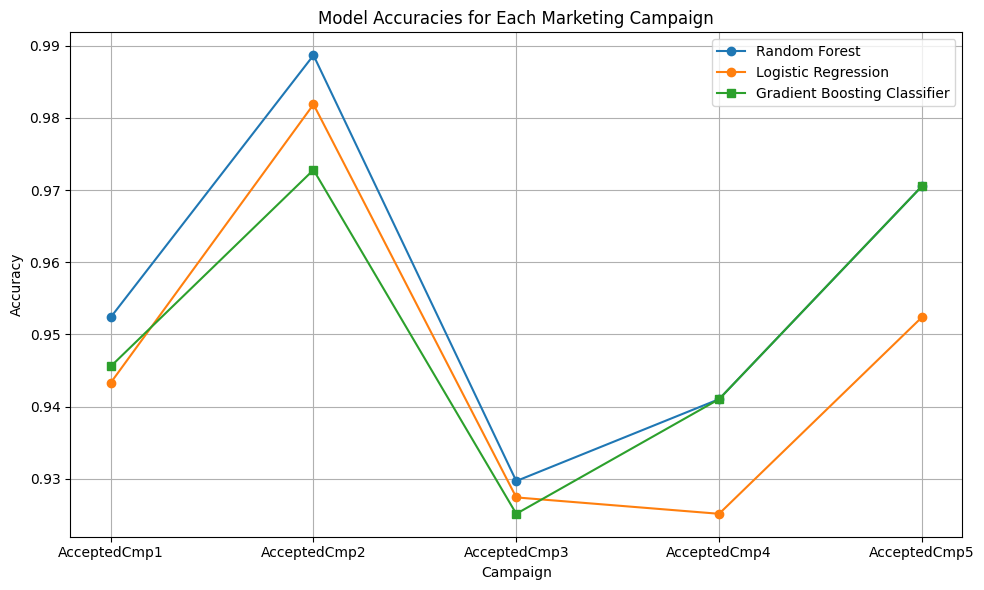

In [211]:
import matplotlib.pyplot as plt

# Extracting campaign names and their accuracies for both Logistic Regression and Gradient Boosting Classifier
campaigns, accuracies_lr = zip(*accuracies_and_features_excluded)
_, accuracy_rf = zip(*accuracy_rf)
_, accuracies_gbc = zip(*accuracies_gbc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(campaigns, accuracy_rf, label='Random Forest', marker='o')
plt.plot(campaigns, accuracies_lr, label='Logistic Regression', marker='o')
plt.plot(campaigns, accuracies_gbc, label='Gradient Boosting Classifier', marker='s')
plt.title('Model Accuracies for Each Marketing Campaign')
plt.xlabel('Campaign')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
save_fig('model_accuracies')
plt.show()
